# Assignment 1

**Due to**: 23/12/2021 (dd/mm/yyyy)

**Credits**: Andrea Galassi, Federico Ruggeri, Paolo Torroni

**Summary**: Part-of Speech (POS) tagging as Sequence Labelling using Recurrent Neural Architectures

# Intro

In this assignment  we will ask you to perform POS tagging using neural architectures

You are asked to follow these steps:
*   Download the corpora and split it in training and test sets, structuring a dataframe.
*   Embed the words using GloVe embeddings
*   Create a baseline model, using a simple neural architecture
*   Experiment doing small modifications to the baseline model, choose hyperparameters using the validation set
*   Evaluate your two best model
*   Analyze the errors of your model


**Task**: given a corpus of documents, predict the POS tag for each word

**Corpus**:
Ignore the numeric value in the third column, use only the words/symbols and its label. 
The corpus is available at:
https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip

**Splits**: documents 1-100 are the train set, 101-150 validation set, 151-199 test set.


**Features**: you MUST use GloVe embeddings as the only input features to the model.

**Splitting**: you can decide to split documents into sentences or not, the choice is yours.

**I/O structure**: The input data will have three dimensions: 1-documents/sentences, 2-token, 3-features; for the output there are 2 possibilities: if you use one-hot encoding it will be 1-documents/sentences, 2-token labels, 3-classes, if you use a single integer that indicates the number of the class it will be 1-documents/sentences, 2-token labels.

**Baseline**: two layers architecture: a Bidirectional LSTM layer and a Dense/Fully-Connected layer on top; the choice of hyper-parameters is yours.

**Architectures**: experiment using a GRU instead of the LSTM, adding an additional LSTM layer, and adding an additional dense layer; do not mix these variantions.


**Training and Experiments**: all the experiments must involve only the training and validation sets.

**Evaluation**: in the end, only the two best models of your choice (according to the validation set) must be evaluated on the test set. The main metric must be F1-Macro computed between the various part of speech. DO NOT CONSIDER THE PUNCTUATION CLASSES.

**Metrics**: the metric you must use to evaluate your final model is the F1-macro, WITHOUT considering punctuation/symbols classes; during the training process you can use accuracy because you can't use the F1 metric unless you use a single (gigantic) batch because there is no way to aggregate "partial" F1 scores computed on mini-batches.

**Discussion and Error Analysis** : verify and discuss if the results on the test sets are coherent with those on the validation set; analyze the errors done by your model, try to understand which may be the causes and think about how to improve it.

**Report**: you are asked to deliver the code of your experiments and a small pdf report of about 2 pages; the pdf must begin with the names of the people of your team and a small abstract (4-5 lines) that sums up your findings.

# Out Of Vocabulary (OOV) terms

How to handle words that are not in GloVe vocabulary?
You can handle them as you want (random embedding, placeholder, whatever!), but they must be STATIC embeddings (you cannot train them).

But there is a very important caveat! As usual, the element of the test set must not influence the elements of the other splits!

So, when you compute new embeddings for train+validation, you must forget about test documents.
The motivation is to emulate a real-world scenario, where you select and train a model in the first stage, without knowing nothing about the testing environment.

For implementation convenience, you CAN use a single vocabulary file/matrix/whatever. The principle of the previous point is that the embeddings inside that file/matrix must be generated independently for train and test splits.

Basically in a real-world scenario, this is what would happen:
1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Training of the model(s)
5. Compute embeddings for terms OOV2 of the validation split 
6. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
7. Validation of the model(s)
8. Compute embeddings for terms OOV3 of the test split 
9. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2+OOV3
10. Testing of the final model

In this case, where we already have all the documents, we can simplify the process a bit, but the procedure must remain rigorous.

1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Compute embeddings for terms OOV2 of the validation split 
5. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
6. Compute embeddings for terms OOV3 of the test split 
7. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2
8. Training of the model(s)
9. Validation of the model(s)
10. Testing of the final model

Step 2 and step 6 must be completely independent of each other, for what concerns the method and the documents. But they can rely on the previous vocabulary (V1 for step 2 and V3 for step 6)
THEREFORE if a word is present both in the training set and the test split and not in the starting vocabulary, its embedding is computed in step 2) and it is not considered OOV anymore in step 6).

# Report
The report must not be just a copy and paste of graphs and tables!

The report must not be longer than 2 pages and must contain:
* The names of the member of your team
* A short abstract (4-5 lines) that sum ups everything
* A general description of the task you have addressed and how you have addressed it
* A short description of the models you have used
* Some tables that sum up your findings in validation and test and a discussion of those results
* The most relevant findings of your error analysis

# Evaluation Criterion

The goal of this assignment is not to prove you can find best model ever, but to face a common task, structure it correctly, and follow a correct and rigorous experimental procedure.
In other words, we don't care if you final models are awful as long as you have followed the correct procedure and wrote a decent report.

The score of the assignment will be computed roughly as follows
* 1 point for the general setting of the problem
* 1 point for the handling of OOV terms
* 1 point for the models
* 1 point for train-validation-test procedure
* 2 point for the discussion of the results, error analysis, and report

This distribution of scores is tentative and we may decide to alter it at any moment.
We also reserve the right to assign a small bonus (0.5 points) to any assignment that is particularly worthy. Similarly, in case of grave errors, we may decide to assign an equivalent malus (-0.5 points).

# Contacts

In case of any doubt, question, issue, or help we highly recommend you to check the [course useful material](https://virtuale.unibo.it/pluginfile.php/1036039/mod_resource/content/2/NLP_Course_Useful_Material.pdf) for additional information, and to use the Virtuale forums to discuss with other students.

You can always contact us at the following email addresses. To increase the probability of a prompt response, we reccomend you to write to both the teaching assistants.

Teaching Assistants:

* Andrea Galassi -> a.galassi@unibo.it
* Federico Ruggeri -> federico.ruggeri6@unibo.it

Professor:

* Paolo Torroni -> p.torroni@unibo.it


# FAQ
* You can use a non-trainable Embedding layer to load the glove embeddings
* You can use any library of your choice to implement the networks. Two options are tensorflow/keras or pythorch. Both these libraries have all the classes you need to implement these simple architectures and there are plenty of tutorials around, where you can learn how to use them.

# Import libraries & download dataset

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns  
from sklearn.metrics import confusion_matrix, classification_report

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
from torch.nn.utils.rnn import pad_sequence
import torch.optim as optim

from sklearn.preprocessing import OrdinalEncoder

from tqdm import tqdm
from typing import Optional

import gensim
import gensim.downloader as gloader  

import re

!pip install python-Levenshtein
import Levenshtein

import itertools
from functools import partial

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

     |████████████████████████████████| 50 kB 3.2 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149870 sha256=967e263de4fb57e7c766e0c51942ede209b1a4272f8bf31c0cc5e537a2f2f6c4
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [2]:
!wget https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip
!unzip -q dependency_treebank.zip

--2021-12-17 15:27:11--  https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 457429 (447K) [application/zip]
Saving to: ‘dependency_treebank.zip’

dependency_treebank 100%[===================>] 446.71K  --.-KB/s    in 0.03s   

2021-12-17 15:27:11 (12.6 MB/s) - ‘dependency_treebank.zip’ saved [457429/457429]



# Dataframe creation and split into train, val and test set

The way to split the dataset is already defined:  
train set : documents 1-100;  
validation set : documents 101-150;  
test set : documents 151-199;

In [3]:
corpus_path = 'dependency_treebank/'
file_list = sorted(os.listdir(corpus_path))

dfs = [pd.read_csv(corpus_path + f, sep='\t', names=['word', 'label', 'foo']).drop('foo', 1)
          for f in file_list]


dataset = pd.concat(dfs, ignore_index=True)
dataset['word'] = dataset['word'].transform(lambda x : x.lower())  

train_set = pd.concat(dfs[:100], ignore_index=True)
train_set['word'] = train_set['word'].transform(lambda x : x.lower())

val_set = pd.concat(dfs[100:150], ignore_index=True)
val_set['word'] = val_set['word'].transform(lambda x : x.lower())

test_set = pd.concat(dfs[150:199], ignore_index=True)
test_set['word'] = test_set['word'].transform(lambda x : x.lower())

labels = dataset['label'].unique()
words = dataset['word'].unique()

In [4]:
encoder = OrdinalEncoder(dtype=np.int64)
encoder.fit(labels.reshape(-1, 1)) 

OrdinalEncoder(dtype=<class 'numpy.int64'>)

In [5]:
EMBEDDING_SIZE = 50
embedder = gloader.load(f'glove-wiki-gigaword-{EMBEDDING_SIZE}')

[==================================================] 100.0% 66.0/66.0MB downloaded


We started splitting documents in sentences using 
punctuation labelled as '.' as end of sentences.

In [6]:
train_stops = train_set[(train_set['label']=='.')].index
max_length = max(train_stops[1:] - train_stops[:-1])

val_stops = val_set[(val_set['label']=='.')].index
max_length_val = max(val_stops[1:] - val_stops[:-1])

test_stops = test_set[(test_set['label']=='.')].index
max_length_test = max(test_stops[1:] - test_stops[:-1])


OOV_train = set(train_set['word'].unique()).difference(set(embedder.vocab.keys()))
OOV_val = set(val_set['word'].unique()).difference(set(embedder.vocab.keys()))
OOV_test = set(test_set['word'].unique()).difference(set(embedder.vocab.keys()))

In [7]:
print('Before pre-processing:')
print("Train set unique words:", len(train_set['word'].unique()))
print('OOV:', len(OOV_train))
print('Max sentence length', max_length)
print("\nValidation set unique words:", len(val_set['word'].unique()))
print('Max sentence length', max_length_val)
print('OOV:', len(OOV_val))
print("\nTest set unique words:", len(test_set['word'].unique()))
print('Max sentence length', max_length_test)
print('OOV:', len(OOV_test))

Before pre-processing:
Train set unique words: 7404
OOV: 359
Max sentence length 250

Validation set unique words: 5420
Max sentence length 80
OOV: 213

Test set unique words: 3407
Max sentence length 80
OOV: 161


Then we tried to improve the sentences splitting using also the semi-column

In [8]:
train_stops = train_set[(train_set['label']=='.') | (train_set['word']==';')].index
max_length = max(train_stops[1:] - train_stops[:-1])

val_stops = val_set[(val_set['label']=='.') | (val_set['word']==';')].index
max_length_val = max(val_stops[1:] - val_stops[:-1])

test_stops = test_set[(test_set['label']=='.') | (test_set['word']==';')].index
max_length_test = max(test_stops[1:] - test_stops[:-1])

In [9]:
print('After processing')
print('Max sentence length in Train Set:', max_length)
print('Max sentence length in Validation Set:', max_length_val)
print('Max sentence length in Test Set:', max_length_test)

After processing
Max sentence length in Train Set: 67
Max sentence length in Validation Set: 80
Max sentence length in Test Set: 72


In [10]:
def index_of_phrase(stops, word_idx):
  return np.count_nonzero(word_idx > stops)

print("Grouping train set")
train_index_phrase = np.vectorize(partial(index_of_phrase, train_stops))
train_grouped = train_set.groupby(by=train_index_phrase)

print("Grouping val set")
val_index_phrase = np.vectorize(partial(index_of_phrase, val_stops))
val_grouped = val_set.groupby(by=val_index_phrase)

print("Grouping test set")
test_index_phrase = np.vectorize(partial(index_of_phrase, test_stops))
test_grouped = test_set.groupby(by=test_index_phrase)

Grouping train set
Grouping val set
Grouping test set


# OOV processing

In [11]:
OOV = set(words).difference(set(embedder.vocab.keys()))
print(OOV)
print("\nThere are", len(OOV), "OOV")

{'2,303,328', '95,142', 'retin-a', '271,124', 'weisfield', 'ctbs', '30,537', 'tire-kickers', '143.80', 'airline-related', '434.4', '2160.1', 'computer-driven', 'beer-belly', '19-month-old', 'price-support', '382-37', 'ballantine\\/del', 'chinchon', '278.7', 'coche-dury', 'lookee-loos', 'card-member', '372.14', '8.467', 'cotran', 'sulfur-dioxide', '234.4', 'integra-a', 'asset-sale', 'co-developers', 'unfair-trade', 'heiwado', '8.575', 'land-idling', 'safe-deposit', 'side-crash', 'yen-denominated', 'non-biodegradable', 'lower-priority', '238,000-circulation', 'training-wage', 'identity-management', 'clean-air', '18,444', 'lentjes', 'bottom-line', 'sharedata', '3057', 'erbamont', 'arbitrage-related', 'shirt-sleeved', 'fiber-end', '608,413', 'makato', 'intelogic', 'heebie-jeebies', 'chemplus', 'louisiana-pacific', '14.', 'txo', 'c.j.b.', 'dollar-yen', 'auto-safety', 'equal-opportunity', '415.6', 'vitulli', 'herald-american', '3\\/8', 'ac-130u', 'minicrash', '40-megabyte', 'life-of-contract

In [12]:
def isNumber(n):
  if n == 'nan':
    return False

  try:
    float(n)
    return True
  except:
    return False

vocab_keys = embedder.vocab.keys()
vocab_array = np.array(list(vocab_keys))
str_number_keys = [n for n in vocab_keys if isNumber(n)]
number_keys = np.array(str_number_keys, dtype=np.float32)

def correct_typo(word, threshold=1):
  if word in vocab_keys:
    return word

  if re.match('[a-z]', word): #avoid to use Levenshtein on numbers
    dist = lambda elem: Levenshtein.distance(word, elem)
    distances = np.vectorize(dist)(vocab_array)
    idx_min = np.argmin(distances)
    if distances[idx_min] <= threshold:
      return vocab_array[idx_min]

  #maybe it is a number, convert to the nearest one
  try:
    word = word.replace(',', '')
    number = float(word)

    idx = np.argmin(np.abs(number_keys - number))
    return str_number_keys[idx]

  except:
    pass



def handling_OOV(words, OOV, embedder):
  '''
  Try to check if OOV are due to:
     1)Decimal numbers; 
     2)words separated by special character (-, \\/)compuound words ;
     3)Words compuound by two words present in the vocabulary; 
     4)Typos;
  '''

  '''
  Words separated by special characters are encoded using the embedding of the two words.
  For other words we just check the spelling and try to approximate number.
  '''
  print("Correcting numbers, typos and words separated by special characters.")
  for w in tqdm(OOV):
   try:
    if '-' in w:
      subWords = w.split('-')
      embedded_words = [embedder[correct_typo(subW)] for subW in subWords if subW]
      embedder.add([w], [np.mean(embedded_words, axis=0)])
    
    elif '\\/' in w:
      subWords = w.split('\\/')
      embedded_words = [embedder[correct_typo(subW)] for subW in subWords]
      embedder.add([w], [np.mean(embedded_words, axis=0)])

    else:
      embedder.add([w], [embedder[correct_typo(w)]])

   except:
    pass

  
  OOV = set(words).difference(set(embedder.vocab.keys()))
  print("There are", len(OOV), "OOV")
  
  # Compound words
  print('Analyzing compound words')
  for w in tqdm(OOV):
    for i in range(2, len(w)-2):
      w1 = w[:i]
      w2 = w[i:]
      if w1 in vocab_keys and w2 in vocab_keys:
        embedding = (embedder[w1] + embedder[w2]) / 2
        embedder.add([w], [embedding])
        break

  embedder.add(['62%-owned'], [(embedder['.62']+embedder['owned'])/2])

  
  OOV = set(words).difference(set(embedder.vocab.keys()))
  print("There are", len(OOV), "OOV")

  # Typos
  print('Correcting typos with Levenshtein distance up to 2')
  for w in tqdm(OOV):
   try:
    new_w = correct_typo(w, threshold=2)
    embedder.add([w], [embedder[new_w]])
   except:
    pass

  OOV = set(words).difference(set(embedder.vocab.keys()))
  print("\nThere are", len(OOV), "OOV")
  return

In [13]:
handling_OOV(words, OOV, embedder)

Correcting numbers, typos and words separated by special characters.


100%|██████████| 676/676 [00:50<00:00, 13.31it/s]


There are 77 OOV
Analyzing compound words


100%|██████████| 77/77 [00:00<00:00, 88.21it/s]


There are 18 OOV
Correcting typos with Levenshtein distance up to 2


100%|██████████| 18/18 [00:05<00:00,  3.36it/s]


There are 8 OOV


In [14]:
print('After processing')
print('There are ', len(set(OOV_train).difference(set(embedder.vocab.keys()))), ' OOV in the train set')
print('There are ', len(set(OOV_val).difference(set(embedder.vocab.keys()))), ' OOV in the val set')
print('There are ', len(set(OOV_test).difference(set(embedder.vocab.keys()))), ' OOV in the test set')

After processing
There are  6  OOV in the train set
There are  2  OOV in the val set
There are  0  OOV in the test set


Adding the remaining words randomly.

In [15]:
OOV = set(words).difference(set(embedder.vocab.keys()))
OOV_value = np.random.uniform(low=-0.05, high=0.05, size=(len(OOV), EMBEDDING_SIZE))
embedder.add(list(OOV), OOV_value)

# Dataset analysis

In [16]:
print("The max sentence length in training set is", max_length)
print(f'There are {len(train_stops)} sentences in the training set')
print(f'There are {len(labels)} labels')
print(f'There are {len(words)} unique words, {len(OOV)} of them are OOV')

The max sentence length in training set is 67
There are 2046 sentences in the training set
There are 45 labels
There are 10947 unique words, 8 of them are OOV


## Plot dataset distribution

Train, validation and test set more or less follows the same distribution and they share similar characteristics.  
Validation and test sets can be considered representative.

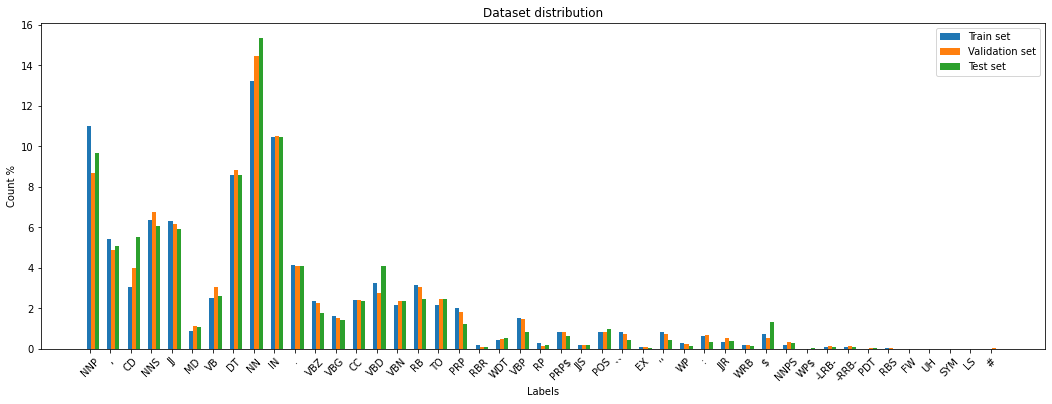

In [ ]:
train_counts = train_set.groupby(by='label').count()
train_counts = train_counts / len(train_set) * 100
val_counts = val_set.groupby(by='label').count()
val_counts = val_counts / len(val_set) * 100
val_counts = val_counts.reindex(labels, fill_value=0)
test_counts = test_set.groupby(by='label').count()
test_counts = test_counts / len(test_set) * 100
test_counts = test_counts.reindex(labels, fill_value=0)
ind = np.arange(len(labels))

plt.figure(figsize=(18,6))
width = 0.2       
plt.bar(ind, train_counts.loc[labels, 'word'] , width, label='Train set');
plt.bar(ind + width, val_counts.loc[labels, 'word'], width, label='Validation set');
plt.bar(ind + 2*width, test_counts.loc[labels, 'word'], width, label='Test set');

plt.xlabel('Labels');
plt.ylabel('Count %');
plt.title('Dataset distribution');

plt.xticks(ind + width / 3, labels, rotation=45);
plt.legend();

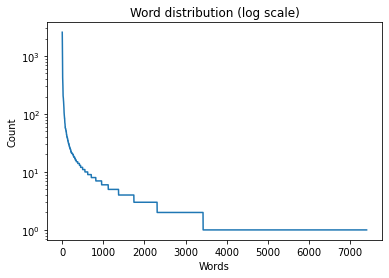

In [ ]:
counts_word = train_set.groupby('word').count().to_numpy()[:, 0]

plt.plot(np.sort(counts_word)[::-1]);
plt.yscale('log')

plt.xlabel('Words');
plt.ylabel('Count');
plt.title('Word distribution (log scale)');

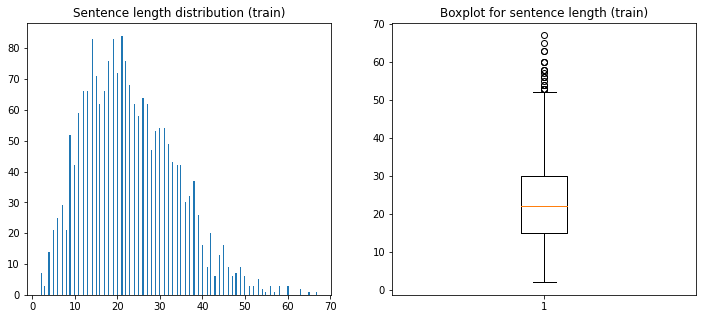

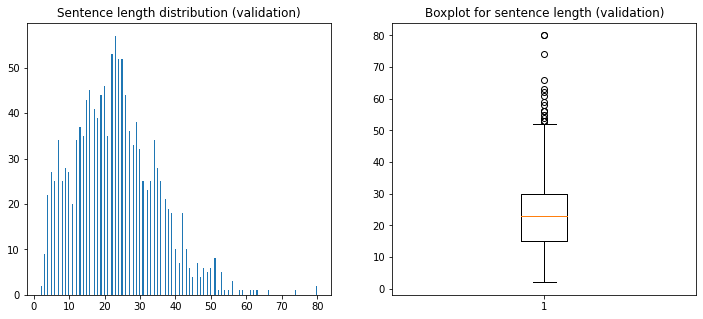

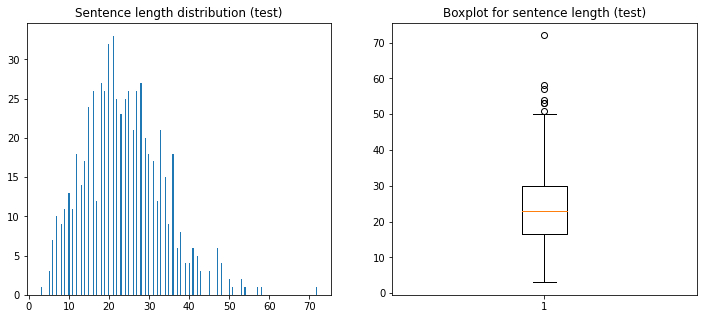

In [ ]:
def make_plot(sentences, name):
  f = plt.figure(figsize=(12, 5))
  ax1 = plt.subplot(121)
  ax2 = plt.subplot(122)

  ax1.hist(sentences.count()['word'], bins=250);
  ax1.set_title(f"Sentence length distribution ({name})");

  ax2.boxplot(sentences.count()['word']);
  ax2.set_title(f"Boxplot for sentence length ({name})");

name_sentences = {
    'train': train_grouped,
    'validation': val_grouped,
    'test': test_grouped
}

for name in name_sentences:
  make_plot(name_sentences[name], name)

# Create RNN, Optimizer and DataLoader classes


In [17]:
class RNN(nn.Module):
  """
    architecture: str
      'LSTM'   : the baseline architecture
      '2-LSTM' : 2 LSTM layers
      '2-FC'   : 2 Dense Layers
      'GRU'    : Gated Recurrent Unit
  """
  def __init__(self, architecture, input_dim, hidden_size, output_size, dropout, device):
    super(RNN, self).__init__()
    self.architecture = architecture
    self.n_layers = 2 if architecture == '2-LSTM' else 1
    self.dropout_in_rnn = dropout if self.n_layers > 1 else 0
    self.output_size = output_size
    self.hidden_size = hidden_size
    self.device = device
    
    if self.architecture == 'GRU':
      self.rnn = nn.GRU(input_dim, hidden_size, num_layers=self.n_layers, bidirectional=True, dropout=self.dropout_in_rnn)
    else:
      self.rnn = nn.LSTM(input_dim, hidden_size, num_layers=self.n_layers, bidirectional=True, dropout=self.dropout_in_rnn)

    self.dropout_layer = nn.Dropout(p=dropout)

    if self.architecture == '2-FC':
      self.fc = nn.Sequential(
          nn.Linear(self.hidden_size*2, self.hidden_size),
          nn.Dropout(p=dropout),
          nn.Linear(self.hidden_size, output_size)
      )
    else:
      self.fc = nn.Linear(self.hidden_size*2, output_size)



  def forward(self, input):
    input = input.permute(1, 0, 2)

    hidden_state = torch.randn(self.n_layers*2, input.shape[1], self.hidden_size).to(self.device)
    if self.architecture == 'GRU':
      hidden = hidden_state
    else:
      cell_state = torch.randn(self.n_layers*2, input.shape[1], self.hidden_size).to(self.device)
      hidden = (hidden_state, cell_state)

    out, hidden = self.rnn(input, hidden)

    out = self.dropout_layer(out)

    #process timesteps independently 
    logits = self.fc(out.view(-1, out.size(2)))
    
    output = logits.view(input.shape[0], input.shape[1], self.output_size)

    return output.permute(1, 0, 2).contiguous()


  def prediction(self, input: DataLoader):
    
    self.eval()
    with torch.no_grad():

      y_pred = torch.Tensor().to(self.device)
      for data in input:  
        words = data['words'].to(device)
        lengths = data['lengths'].to(device)
        scores = self(words)
        classes_predicted = torch.argmax(scores, 2)

        for i, length in enumerate(lengths):
          y_pred = torch.cat((y_pred, classes_predicted[i, :length]), 0)
    
    self.train()
    return y_pred


  def accuracy(self, input: DataLoader):
    num_correct = 0
    num_samples = 0
    self.eval()
    
    with torch.no_grad():
        for data in input:
            word = data['words'].to(device)
            labels = data['labels'].to(device)
            labels = labels.squeeze(-1)
            
            lengths = data['lengths'].to(device)

            scores = self(word)
            classes_predicted = torch.argmax(scores, 2)

            for i, length in enumerate(lengths):
              num_correct += torch.eq(classes_predicted[i, :length], labels[i, :length]).sum().item()

            num_samples += lengths.sum()
        
    
    return num_correct/num_samples



In [18]:
class Optimization:
    def __init__(self, model, loss_fn, optimizer):
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.history = []
    
    def train_step(self, x, y):
        self.model.train()
        yhat = self.model(x)

        yhat = yhat.reshape(-1, yhat.shape[-1])
        y = y.flatten()

        loss = self.loss_fn(yhat, y)
        self.history.append(loss.item())
        loss.backward()

        self.optimizer.step()
        self.optimizer.zero_grad()

        return loss.item()

In [19]:
class MyDataset(Dataset):
  def __init__(self, dataframe, embedder, encoder, max_length=None):
    self.max_length = max_length if max_length else dataframe.count().max()['word']
    self.dataframe = dataframe
    self.embedder = embedder
    self.encoder = encoder

  def __len__(self):
    return len(self.dataframe)

  def __getitem__(self, idx):
    sentence = self.dataframe.get_group(idx)[:self.max_length]

    labels = np.array(sentence['label'], dtype = str).reshape(-1, 1)
    encoded_labels = self.encoder.transform(labels)
    encoded_words = self.embedder[sentence['word']]

    return {'words': encoded_words, 'labels': encoded_labels, 'lengths': len(sentence)}

In [20]:
def collate_fn_pad(batch):
    batch_dict = []
    lengths = torch.Tensor([sample['lengths'] for sample in batch])
    padded_words = pad_sequence([torch.Tensor(sample['words']) for sample in batch], batch_first=True)
    padded_labels = pad_sequence([torch.Tensor(sample['labels']) for sample in batch], batch_first=True, padding_value=-1)

    return {'words': padded_words, 'labels': padded_labels.long(), 'lengths': lengths.int()}


# Training

In [ ]:
%load_ext tensorboard
%tensorboard --logdir="logs"

<IPython.core.display.Javascript object>

## Training and tuning functions

In [30]:
def training_loop(model: nn.Module, 
                  train_set: torch.utils.data.DataLoader,
                  val_set: torch.utils.data.DataLoader,
                  n_epochs: int,
                  optimization: Optimization,
                  save_path: str,
                  load_model: Optional[str] = None,
                  writer: Optional[SummaryWriter] = None):
  
  if load_model:
    model.load_state_dict(torch.load(load_model))

  model.to(device)
  train_acc = np.zeros(n_epochs)
  val_acc = np.zeros(n_epochs)
  best_acc = 0
  scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.1, 
                                patience=10, threshold=0.0001, threshold_mode='rel', cooldown=0, 
                                min_lr=0, eps=1e-08, verbose=False)

  for epoch in range(n_epochs):
    print(f'Epoch {epoch+1}')

    for data in tqdm(train_set):
      w = data['words'].to(device)
      l = data['labels'].to(device)
      optimization.train_step(w, l)
      
    print(f'loss:{optimization.history[epoch] : .3f}')
    train_acc[epoch] = model.accuracy(train_set)
    print(f'train acc:{train_acc[epoch]}')
    val_acc[epoch] = model.accuracy(val_set)
    print(f'val acc:{val_acc[epoch]}')
    
    scheduler.step(val_acc[epoch])

    writer.add_scalars('Loss', {"Train": optimization.history[epoch]}, epoch)
    writer.add_scalars('Train Acc', {"Train": val_acc[epoch]}, epoch)
    writer.add_scalars('Val Acc', {"Train": val_acc[epoch]}, epoch)
    writer.flush()

    if val_acc[epoch] > best_acc:
      torch.save(model.state_dict(), save_path)
      best_acc = val_acc[epoch]
      print(f'Model saved at {save_path}')
      
  writer.close()
  print(f'\n Best model at epoch {np.argmax(val_acc) + 1}')

  return best_acc

In [22]:
def tuning_loop(train_loader: torch.utils.data.DataLoader,
                val_loader: torch.utils.data.DataLoader,
                sup_epochs: int,
                search: dict, 
                writer: Optional[SummaryWriter] = None):

  best_model_acc = 0
  config = []
  for architecture, hidden_dim, dropout in itertools.product(search['architecture'], 
                                                             search['hidden_dim'], 
                                                             search['dropout']):
    print('='*15)
    print('New setting with', architecture)
    print('hidden_dim :', hidden_dim)
    print('dropout :', dropout)

    model = RNN(architecture, EMBEDDING_SIZE, hidden_dim, len(labels), dropout, device)
    model.to(device)
    loss = nn.CrossEntropyLoss(ignore_index=-1)
    optimizer = optim.Adam(model.parameters())
    optimization = Optimization(model, loss, optimizer)

    path = f'model-{architecture}-{hidden_dim}-{dropout}.pkl'
    n_epochs = int(sup_epochs * dropout)
    best_acc = training_loop(model, train_loader, val_loader, n_epochs, optimization, path, False, writer=writer)

    if best_acc > best_model_acc:
      config = [hidden_dim, dropout]
      best_model_acc = best_acc
      new_path = f'model-{architecture}'
      !\cp $path $new_path

  print(f'\n Best model config : {config} with accuracy {best_model_acc}')

In [32]:
def hyper_tuning_loop(train_loader: torch.utils.data.DataLoader,
                val_loader: torch.utils.data.DataLoader,
                sup_epochs: int,
                search: dict, 
                writer: Optional[SummaryWriter] = None):

  best_model_acc = 0
  config = []
  for lr, beta1, beta2, weight_decay, eps in itertools.product(search['lr'], 
                                                             search['beta1'], 
                                                             search['beta2'],
                                                             search['weight_decay'],
                                                             search['eps']
                                                             ):
    print('='*15)
    print('lr:', lr)
    print('beta1 :', beta1)
    print('beta2 :', beta2)
    print('weight decay :', weight_decay)
    print('eps :', eps)


    path = f'model-{lr}-{beta1}-{beta2}-{weight_decay}-{eps}.pkl'

    model = RNN('2-FC', EMBEDDING_SIZE, 128, len(labels), 0.6, device)
    model.to(device)
    loss = nn.CrossEntropyLoss(ignore_index=-1)
    optimizer = optim.Adam(model.parameters())
    optimization = Optimization(model, loss, optimizer)

    n_epochs = sup_epochs
    best_acc = training_loop(model, train_loader, val_loader, n_epochs, optimization, path, False, writer=writer)

    if best_acc > best_model_acc:
      config = [lr, beta1, beta2, weight_decay, eps]
      best_model_acc = best_acc
      new_path = f'model-2FC'
      !\cp $path $new_path

  print(f'\n Best model config : {config} with accuracy {best_model_acc}')

## Start tuning

In [ ]:
search = {'architecture': ['LSTM', '2-LSTM', '2-FC', 'GRU'],
          'hidden_dim': [128, 256, 512],
          'dropout': [0.4, 0.6, 0.8]
          }


In [34]:
search_hyp= {'lr': [1e-1, 1e-2, 1e-3],
          'beta1': [0.85, 0.9, 0.95],
          'beta2': [0.9, 0.99, 0.999],
          'weight_decay': [0, 0.05, 0.1],
          'eps': [1e-7, 1e-8, 1e-9]
}

In [24]:
train_set = MyDataset(train_grouped, embedder, encoder)
train_loader = DataLoader(train_set, batch_size=8, shuffle=True, collate_fn=collate_fn_pad)

validation = MyDataset(val_grouped, embedder, encoder)
val_loader = DataLoader(validation, batch_size=len(validation), collate_fn=collate_fn_pad)

In [25]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [27]:
model = RNN('2-FC', EMBEDDING_SIZE, 128, len(labels), 0.6, device)
model.to(device)
loss = nn.CrossEntropyLoss(ignore_index=-1)
optimizer = optim.Adam(model.parameters())
optimization = Optimization(model, loss, optimizer)

In [29]:
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08, verbose=False)

In [ ]:
SUP_EPOCHS = 60
writer = torch.utils.tensorboard.writer.SummaryWriter(log_dir=os.path.join("logs", "BiLSTM"))

hyper_tuning_loop(train_loader, val_loader, SUP_EPOCHS, search_hyp, writer)

lr: 0.1
beta1 : 0.85
beta2 : 0.9
weight decay : 0
eps : 1e-07
Epoch 1


100%|██████████| 256/256 [00:05<00:00, 47.04it/s]


loss: 3.804
train acc:0.6986231803894043
val acc:0.6815893054008484
Model saved at model-0.1-0.85-0.9-0-1e-07.pkl
Epoch 2


100%|██████████| 256/256 [00:05<00:00, 47.96it/s]


loss: 3.797
train acc:0.7654995918273926
val acc:0.7477150559425354
Model saved at model-0.1-0.85-0.9-0-1e-07.pkl
Epoch 3


100%|██████████| 256/256 [00:05<00:00, 49.71it/s]


loss: 3.770
train acc:0.8007221817970276
val acc:0.776448667049408
Model saved at model-0.1-0.85-0.9-0-1e-07.pkl
Epoch 4


100%|██████████| 256/256 [00:05<00:00, 49.81it/s]


loss: 3.736
train acc:0.8266534209251404
val acc:0.803835391998291
Model saved at model-0.1-0.85-0.9-0-1e-07.pkl
Epoch 5


100%|██████████| 256/256 [00:05<00:00, 50.25it/s]


loss: 3.697
train acc:0.8435044884681702
val acc:0.816694974899292
Model saved at model-0.1-0.85-0.9-0-1e-07.pkl
Epoch 6


100%|██████████| 256/256 [00:05<00:00, 50.10it/s]


loss: 3.684
train acc:0.8544429540634155
val acc:0.8279831409454346
Model saved at model-0.1-0.85-0.9-0-1e-07.pkl
Epoch 7


100%|██████████| 256/256 [00:05<00:00, 50.05it/s]


loss: 3.612
train acc:0.8654869198799133
val acc:0.8381810188293457
Model saved at model-0.1-0.85-0.9-0-1e-07.pkl
Epoch 8


100%|██████████| 256/256 [00:05<00:00, 49.85it/s]


loss: 3.578
train acc:0.8744403719902039
val acc:0.8477374911308289
Model saved at model-0.1-0.85-0.9-0-1e-07.pkl
Epoch 9


100%|██████████| 256/256 [00:05<00:00, 49.14it/s]


loss: 3.535
train acc:0.8802897334098816


After tuning all the possible combinations of hyperparameters and architectures, the results are pretty similar. Across the architectures, usually, the  best combination of hyperparameters is: 
* hidden_dim = 128
* dropout = 0.6

2-LSTM and 2-FC perform slightly better, so we decide to train them.

# Confusion Matrix and Report


In [ ]:
punctuation = np.array([',', '.', '``', "''",  ':', '#', '$' ])
mask = np.array([l not in punctuation for l in labels], dtype=int)
no_punc_labels = labels[mask == 1]

y_pred= model.prediction(val_loader)
y_true_encoded = encoder.transform(np.array(val_set['label']).reshape(-1,1))

In [ ]:
report = classification_report(y_true_encoded, y_pred.cpu(), target_names=labels, output_dict=True, zero_division = 1)

In [ ]:
from prettytable import PrettyTable

class_table = PrettyTable(['Class', 'Precision', 'Recall', 'f1-score', 'support'])

macro_avg = np.zeros(3)
weighted_avg = np.zeros(3)
samples = int(report['macro avg']['support'])

for label in no_punc_labels:
  class_table.add_row([str(label), report[label]['precision'], report[label]['recall'], report[label]['f1-score'], report[label]['support']])
  macro_avg += np.array([report[label]['precision'], report[label]['recall'], report[label]['f1-score']], dtype=int)
  weighted_avg += np.array([report[label]['precision'], report[label]['recall'], report[label]['f1-score']], dtype=int)*int(report[label]['support'])

print(class_table)

macro_avg = macro_avg/len(no_punc_labels)
weighted_avg = weighted_avg/samples

average_table = PrettyTable(['Average', 'Precision', 'Recall', 'f1-score', 'accuracy'])
average_table.add_row(['macro avg', macro_avg[0],  macro_avg[1],  macro_avg[2], report['accuracy']])
average_table.add_row(['weighted avg', weighted_avg[0],  weighted_avg[1],  weighted_avg[2], report['accuracy']])

print(average_table)

+-------+------------------------+------------------------+-----------------------+---------+
| Class |       Precision        |         Recall         |        f1-score       | support |
+-------+------------------------+------------------------+-----------------------+---------+
|  NNP  |          0.0           |          0.0           |          0.0          |    15   |
|   CD  |          0.0           |          0.0           |          0.0          |   225   |
|  NNS  |          0.0           |          0.0           |          0.0          |   1528  |
|   JJ  |  0.08333333333333333   |          0.02          |  0.03225806451612903  |    50   |
|   MD  |          0.0           |          0.0           |          0.0          |    53   |
|   VB  |          0.0           |          0.0           |          0.0          |   1277  |
|   DT  |          0.0           |          0.0           |          0.0          |   214   |
|   NN  |  0.008620689655172414  |  0.006596306068601583  | 

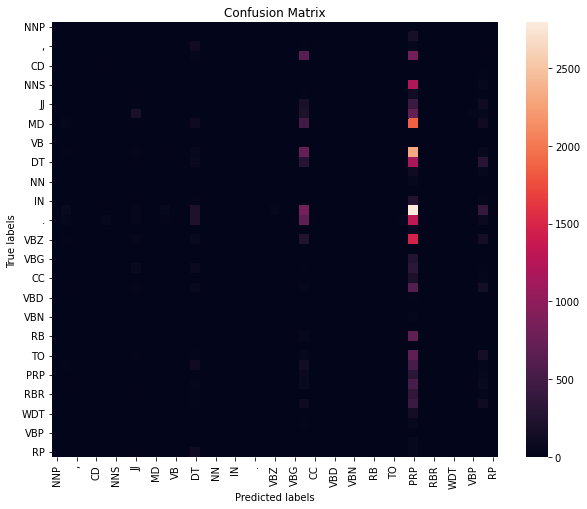

In [ ]:
cm = confusion_matrix(y_true_encoded, y_pred.cpu())

plt.rcParams["figure.figsize"] = (10, 8)
ax= plt.subplot()
sns.heatmap(cm)

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels.flatten()); 
plt.xticks(rotation=90);
ax.yaxis.set_ticklabels(labels.flatten());
plt.yticks(rotation=0);